In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
dat_P = pd.read_csv("dat_P_sub_c.csv")

In [67]:
dat_P

,Pass_ID,valid_P_ID,Airfield,S2,Wait_Time,C_Start,C0,C_avg,Sch_Departure,Act_Departure,...,Day_of_Week,Month,Season,Year,WT_flag,S2_Sch_Flag,S2_Act_Flag,Sch_Act_Flag,Flight_ID,Delay_in_Seconds
0,5348206,1,AUC,9/1/2028 6:37,NaN,1,1,1.0,9/1/2028 8:06,9/1/2028 8:06,...,5 - FRI,9-Sep,3 - SUMMER,2028,1,0,0,0,18095,0
1,5348209,1,AUC,9/1/2028 6:38,NaN,1,1,1.0,9/1/2028 8:06,9/1/2028 8:06,...,5 - FRI,9-Sep,3 - SUMMER,2028,1,0,0,0,18095,0
2,5348216,1,AUC,9/1/2028 6:39,NaN,1,1,1.0,9/1/2028 8:06,9/1/2028 8:06,...,5 - FRI,9-Sep,3 - SUMMER,2028,1,0,0,0,18095,0
3,5348224,1,AUC,9/1/2028 6:39,NaN,1,1,1.0,9/1/2028 8:06,9/1/2028 8:06,...,5 - FRI,9-Sep,3 - SUMMER,2028,1,0,0,0,18095,0
4,5348225,1,AUC,9/1/2028 6:40,NaN,1,1,1.0,9/1/2028 8:06,9/1/2028 8:06,...,5 - FRI,9-Sep,3 - SUMMER,2028,1,0,0,0,18095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114127,6438181,1,AUC,12/31/2028 18:55,NaN,1,1,1.0,12/31/2028 20:06,12/31/2028 20:06,...,7 - SUN,12-Dec,4 - AUTUMN,2028,1,0,0,0,21678,0
114128,6438424,1,AUC,12/31/2028 19:18,NaN,1,1,1.0,12/31/2028 20:06,12/31/2028 20:06,...,7 - SUN,12-Dec,4 - AUTUMN,2028,1,0,0,0,21678,0
114129,6438426,1,AUC,12/31/2028 19:18,NaN,1,1,1.0,12/31/2028 20:06,12/31/2028 20:06,...,7 - SUN,12-Dec,4 - AUTUMN,2028,1,0,0,0,21678,0
114130,6438427,1,AUC,12/31/2028 19:19,NaN,1,1,1.0,12/31/2028 20:06,12/31/2028 20:06,...,7 - SUN,12-Dec,4 - AUTUMN,2028,1,0,0,0,21678,0


In [68]:
for column in dat_P:
    print(column)
    print(pd.unique(dat_P[column]))
    print(" ")

Pass_ID
[5348206 5348209 5348216 ... 6438426 6438427 6438439]
 
valid_P_ID
[1]
 
Airfield
['AUC']
 
S2
['9/1/2028 6:37' '9/1/2028 6:38' '9/1/2028 6:39' ... '12/31/2028 19:18'
 '12/31/2028 19:19' '12/31/2028 19:21']
 
Wait_Time
[nan 10.  7.  6.  9.  8.  4.  3.  2. 11.  5. 13. 14. 12.  1. 27. 15. 17.
 20. 22. 16. 18. 21. 23. 19. 75. 33. 45. 41. 37. 24. 39. 36. 44. 42. 32.
 30. 26. 29. 25. 31. 34. 28. 35. 69. 68. 46. 60. 52.]
 
C_Start
[1 2 3]
 
C0
[1 2 3]
 
C_avg
[1.         2.         1.5        0.5        1.33333333 1.2
 1.66666667 2.33333333 2.5        2.66666667 3.         1.75
 0.75      ]
 
Sch_Departure
['9/1/2028 8:06' '9/1/2028 8:13' '9/1/2028 8:46' ... '12/31/2028 19:21'
 '12/31/2028 19:56' '12/31/2028 20:06']
 
Act_Departure
['9/1/2028 8:06' '9/1/2028 8:13' '9/1/2028 8:46' ... '12/31/2028 19:21'
 '12/31/2028 21:29' '12/31/2028 20:06']
 
BFO_Dest_City
['BORQUE' 'VES033' 'VES064' 'BORCWL' 'NEN003' 'BOR030' 'VES066' '     .'
 'SCO050' 'VES023' 'SCO039' 'VES009' 'SCO048' 'VES018' 

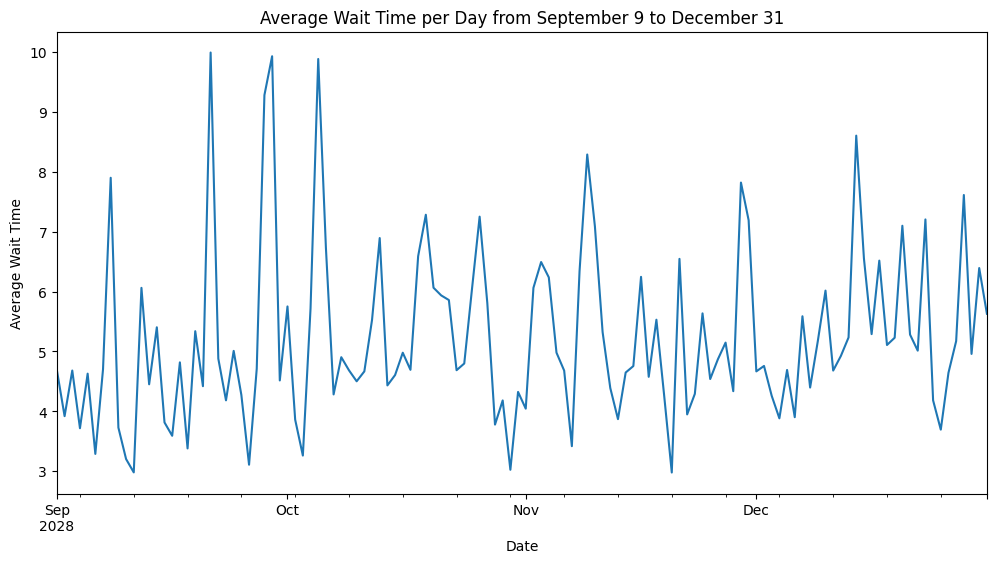

In [69]:
dat_P['Departure_Date'] = pd.to_datetime(dat_P['Departure_Date'])
dat_P['Wait_Time'] = pd.to_numeric(dat_P['Wait_Time'], errors='coerce')
daily_avg_wait_time = dat_P.groupby('Departure_Date')['Wait_Time'].mean()

plt.figure(figsize=(12, 6))
daily_avg_wait_time.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Average Wait Time')
plt.title('Average Wait Time per Day from September 9 to December 31')
plt.show()

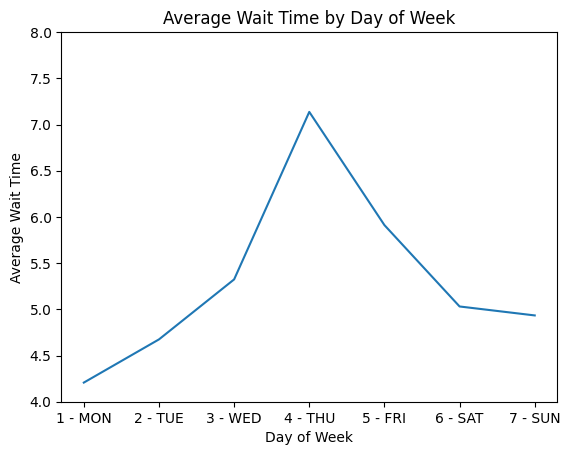

In [70]:
daily_avg_wait_time_by_day_of_week = dat_P.groupby('Day_of_Week')['Wait_Time'].mean()
daily_avg_wait_time_by_day_of_week.plot(kind = 'line')
plt.ylim(4, 8)
plt.xlabel('Day of Week')
plt.ylabel('Average Wait Time')
plt.title('Average Wait Time by Day of Week')
plt.show()

C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Wait Time Distribution by Day of Week')

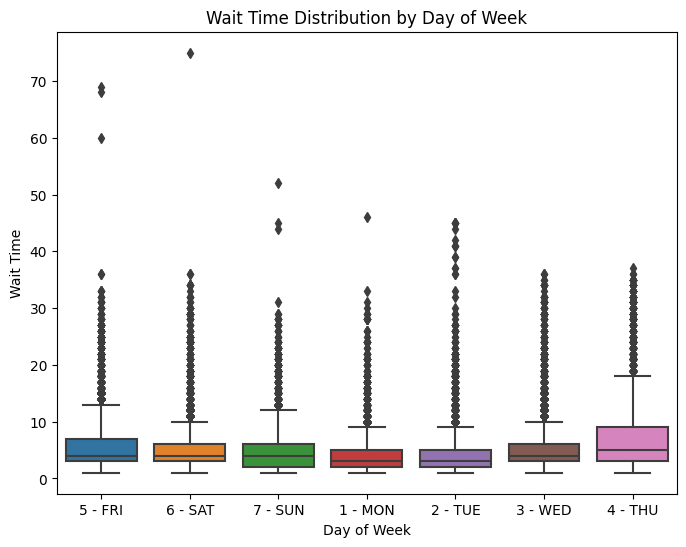

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dat_P["Day_of_Week"], y=dat_P["Wait_Time"])
plt.xlabel('Day of Week')
plt.ylabel('Wait Time')
plt.title('Wait Time Distribution by Day of Week')

In [72]:
daily_avg_wait_time_by_month = dat_P.groupby('Month')['Wait_Time'].mean()
daily_avg_wait_time_by_month

Month
10-Oct    5.538489
11-Nov    5.483924
12-Dec    5.481192
9-Sep     5.100919
Name: Wait_Time, dtype: float64

In [73]:
temp_month_data = {'9-Sep': 5.100919, '10-Oct': 5.538489, '11-Nov': 5.483924, '12-Dec': 5.481192}
daily_avg_wait_time_by_month = pd.Series(temp_month_data)
daily_avg_wait_time_by_month

9-Sep     5.100919
10-Oct    5.538489
11-Nov    5.483924
12-Dec    5.481192
dtype: float64

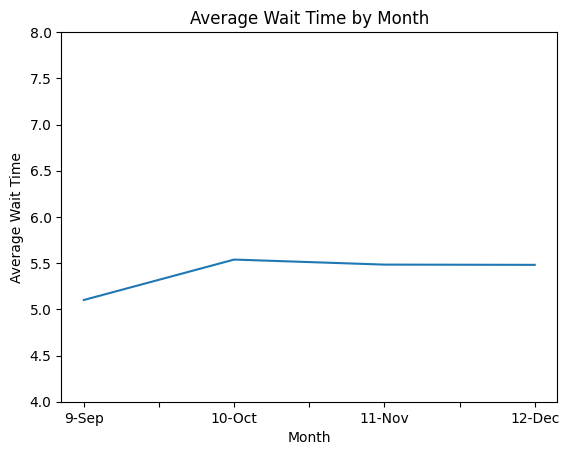

In [74]:
daily_avg_wait_time_by_month.plot(kind = 'line')
plt.ylim(4, 8)
plt.xlabel('Month')
plt.ylabel('Average Wait Time')
plt.title('Average Wait Time by Month')
plt.show()

C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Wait Time Distribution by Month')

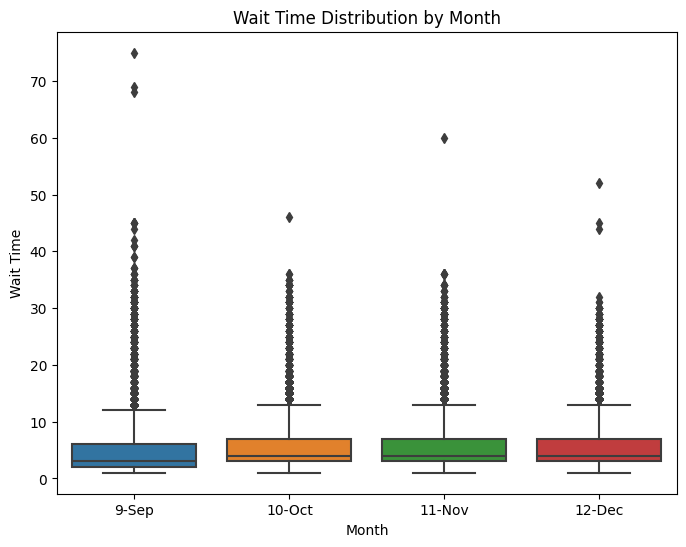

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dat_P["Month"], y=dat_P["Wait_Time"])
plt.xlabel('Month')
plt.ylabel('Wait Time')
plt.title('Wait Time Distribution by Month')

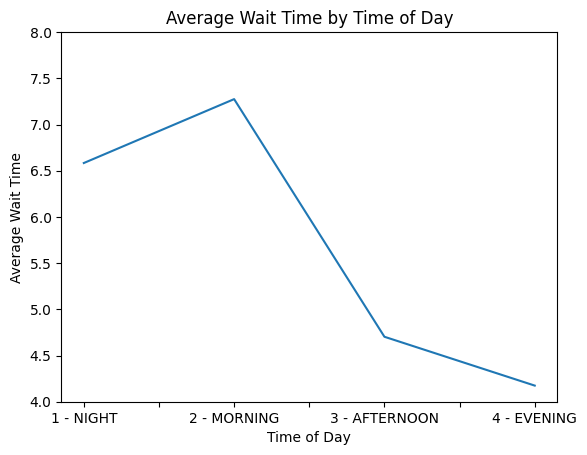

In [76]:
daily_avg_wait_time_by_time_of_day = dat_P.groupby('Time_of_Day')['Wait_Time'].mean()
daily_avg_wait_time_by_time_of_day.plot(kind = 'line')
plt.ylim(4, 8)
plt.xlabel('Time of Day')
plt.ylabel('Average Wait Time')
plt.title('Average Wait Time by Time of Day')
plt.show()

C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Wait Time Distribution by Time of Day')

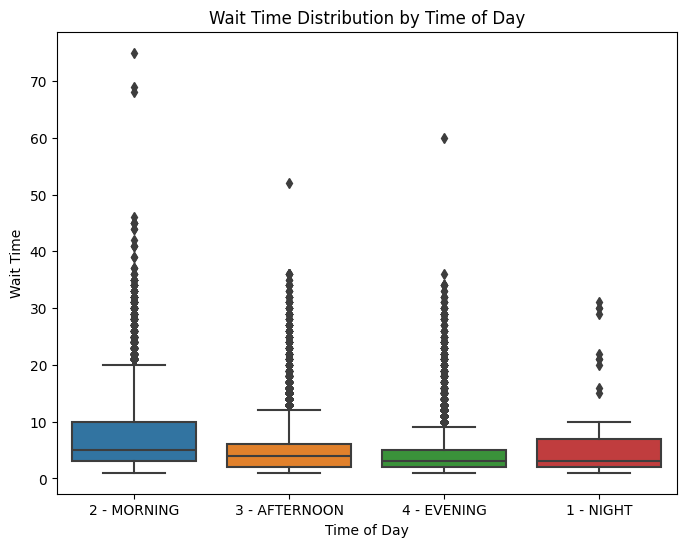

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dat_P["Time_of_Day"], y=dat_P["Wait_Time"])
plt.xlabel('Time of Day')
plt.ylabel('Wait Time')
plt.title('Wait Time Distribution by Time of Day')

In [78]:
passengers_per_day_of_week = dat_P['Day_of_Week'].value_counts().sort_index()
passengers_per_day_of_week

Day_of_Week
1 - MON    12755
2 - TUE    14617
3 - WED    18168
4 - THU    19894
5 - FRI    14933
6 - SAT    18247
7 - SUN    15518
Name: count, dtype: int64

In [79]:
daily_avg_wait_time_by_day_of_week

Day_of_Week
1 - MON    4.207095
2 - TUE    4.674492
3 - WED    5.323810
4 - THU    7.136664
5 - FRI    5.911364
6 - SAT    5.030802
7 - SUN    4.933925
Name: Wait_Time, dtype: float64

In [80]:
passengers_per_day_of_week.corr(daily_avg_wait_time_by_day_of_week) # busyness 

0.7229741338661612

In [81]:
passengers_by_month = dat_P['Month'].value_counts().sort_index()
passengers_by_month

Month
10-Oct    29075
11-Nov    27877
12-Dec    31576
9-Sep     25604
Name: count, dtype: int64

In [82]:
daily_avg_wait_time_by_month

9-Sep     5.100919
10-Oct    5.538489
11-Nov    5.483924
12-Dec    5.481192
dtype: float64

In [83]:
passengers_by_month.corr(daily_avg_wait_time_by_month) # busyness 

0.7587755235778888

In [84]:
passengers_by_time_of_day = dat_P['Time_of_Day'].value_counts().sort_index()
passengers_by_time_of_day

Time_of_Day
1 - NIGHT           79
2 - MORNING      37638
3 - AFTERNOON    41492
4 - EVENING      34923
Name: count, dtype: int64

C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Relationship Between Passenger Wait Time and Number of Servers at S1')

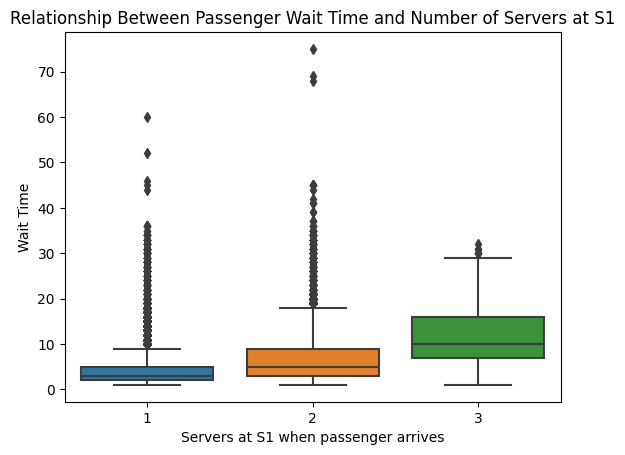

In [85]:
sns.boxplot(x=dat_P["C_Start"], y=dat_P["Wait_Time"])
plt.xlabel('Servers at S1 when passenger arrives')
plt.ylabel('Wait Time')
plt.title('Relationship Between Passenger Wait Time and Number of Servers at S1')

In [86]:
average_wait_time_s1 = dat_P.groupby('C_Start')['Wait_Time'].mean()
average_wait_time_s1

C_Start
1     4.444161
2     7.007063
3    11.593828
Name: Wait_Time, dtype: float64

C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Relationship Between Passenger Wait Time and Number of Servers at S2')

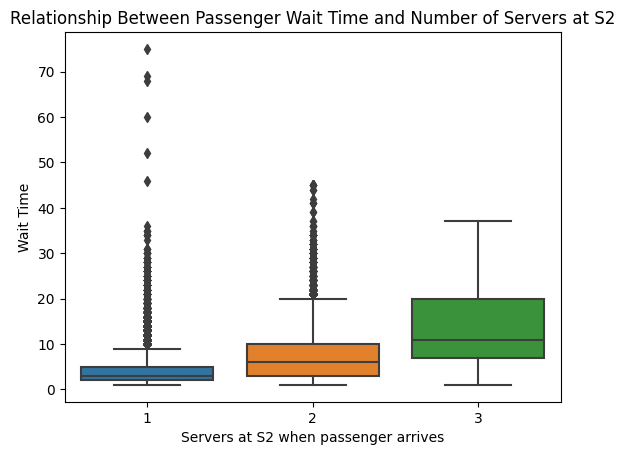

In [87]:
sns.boxplot(x=dat_P["C0"], y=dat_P["Wait_Time"])
plt.xlabel('Servers at S2 when passenger arrives')
plt.ylabel('Wait Time')
plt.title('Relationship Between Passenger Wait Time and Number of Servers at S2')

In [88]:
average_wait_time_s2 = dat_P.groupby('C0')['Wait_Time'].median()
average_wait_time_s2

C0
1     3.0
2     6.0
3    11.0
Name: Wait_Time, dtype: float64

C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Relationship Between Passenger Wait Time and Average Number of Servers While Passenger is in PBS Queue')

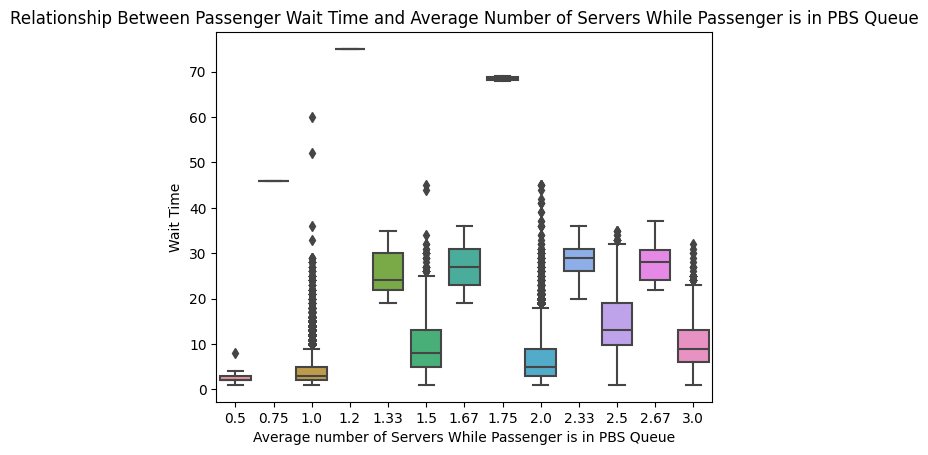

In [89]:
dat_P["C_avg_rounded"] = dat_P["C_avg"].round(2)

sns.boxplot(x=dat_P["C_avg_rounded"], y=dat_P["Wait_Time"])
plt.xlabel('Average number of Servers While Passenger is in PBS Queue')
plt.ylabel('Wait Time')
plt.title('Relationship Between Passenger Wait Time and Average Number of Servers While Passenger is in PBS Queue')

Is there a correlation between flight delays and busyness? Flight delays and wait times? (below)

In [90]:
daily_avg_delay_by_day_of_week = dat_P.groupby('Day_of_Week')['Delay_in_Seconds'].mean()
daily_avg_delay_by_day_of_week

Day_of_Week
1 - MON     773.367307
2 - TUE    1111.754806
3 - WED     721.571995
4 - THU     955.792701
5 - FRI    1148.771178
6 - SAT     907.040061
7 - SUN     782.130429
Name: Delay_in_Seconds, dtype: float64

In [91]:
passengers_per_day_of_week.corr(daily_avg_delay_by_day_of_week) # The more passengers, the less delays (by day of week)

-0.10798226946508899

In [92]:
daily_avg_delay_by_month = dat_P.groupby('Month')['Delay_in_Seconds'].mean()
daily_avg_delay_by_month

Month
10-Oct     700.356320
11-Nov     570.414320
12-Dec    1537.121865
9-Sep      753.041712
Name: Delay_in_Seconds, dtype: float64

In [93]:
passengers_by_month.corr(daily_avg_delay_by_month) # The more passengers, the more delays (by month)

0.7578241422398289

In [94]:
daily_avg_delay_by_time_of_day = dat_P.groupby('Time_of_Day')['Delay_in_Seconds'].mean()
daily_avg_delay_by_time_of_day

Time_of_Day
1 - NIGHT        12034.177215
2 - MORNING        225.278176
3 - AFTERNOON      844.498699
4 - EVENING       1706.946139
Name: Delay_in_Seconds, dtype: float64

In [95]:
passengers_by_time_of_day.corr(daily_avg_delay_by_time_of_day) # The more passengers, the less delays (by time of day)

-0.9917638809982208

In [96]:
daily_avg_wait_time_by_day_of_week.corr(daily_avg_delay_by_day_of_week) # The longer wait times, the more delays (by day of week)

0.3046860870078002

In [97]:
daily_avg_wait_time_by_month.corr(daily_avg_delay_by_month) # The longer wait times, the more delays (by month)

0.15235500173826186

In [98]:
daily_avg_wait_time_by_time_of_day.corr(daily_avg_delay_by_time_of_day) # The longer wait times, the more delays (by time of day)

0.3132610903879686

Now let's look at passenger volume on flights

In [99]:
#passengers_per_day_of_week = dat_P['Day_of_Week'].value_counts().sort_index()
passengers_per_flight = dat_P['Flight_ID'].value_counts().sort_index()
passengers_per_flight.head(10)

Flight_ID
18095    55
18096    38
18097    32
18098    21
18099    57
18100    44
18101    16
18102    35
18103    38
18104    24
Name: count, dtype: int64

In [100]:
avg_wait_time_per_flight = dat_P.groupby('Flight_ID')['Wait_Time'].mean().sort_index()
avg_wait_time_per_flight

Flight_ID
18095    6.157895
18096    6.636364
18097    4.384615
18098    5.550000
18099    6.978723
           ...   
21674    4.363636
21675    5.274194
21676    5.000000
21677         NaN
21678    4.500000
Name: Wait_Time, Length: 3583, dtype: float64

In [101]:
passengers_per_flight.corr(avg_wait_time_per_flight) # People on busier flights waited more average

0.11634808286432281

In [102]:
# IGNORE

#flights_per_day_of_week = dat_P.groupby('Day_of_Week')['Flight_ID'].nunique()
#flights_per_day_of_week
#flights_per_day_of_week.corr(daily_avg_wait_time_by_day_of_week) # basically no correlation between flight schedule intensity and wait time (by day of week)
# although i'm not sure how much this calculation makes sense because it's the TOTAL number of flights on 
#ALL mondays, tuesday, etc. what if there is more mondays in the dataset..

In [103]:
day_counts = dat_P['Day_of_Week'].value_counts()
day_counts

Day_of_Week
4 - THU    19894
6 - SAT    18247
3 - WED    18168
7 - SUN    15518
5 - FRI    14933
2 - TUE    14617
1 - MON    12755
Name: count, dtype: int64

In [104]:
# schedule instensity of departing flights, effect on wait time (from project instructions) below

In [105]:
flights_per_day = dat_P.groupby('Departure_Date')['Flight_ID'].nunique()
flights_per_day

Departure_Date
2028-09-01    20
2028-09-02    24
2028-09-03    30
2028-09-04    32
2028-09-05    32
              ..
2028-12-27    27
2028-12-28    31
2028-12-29    21
2028-12-30    29
2028-12-31    20
Name: Flight_ID, Length: 122, dtype: int64

In [106]:
avg_wait_time_per_day = dat_P.groupby('Departure_Date')['Wait_Time'].mean()
avg_wait_time_per_day

Departure_Date
2028-09-01    4.685039
2028-09-02    3.918977
2028-09-03    4.680702
2028-09-04    3.717213
2028-09-05    4.628692
                ...   
2028-12-27    5.173036
2028-12-28    7.613100
2028-12-29    4.958420
2028-12-30    6.392891
2028-12-31    5.629195
Name: Wait_Time, Length: 122, dtype: float64

In [107]:
flights_per_day.corr(avg_wait_time_per_day) # The more flights in a day, the more people waited

0.10705275017782595

In [108]:
# random calculations below

In [109]:
unique_times_per_period = dat_P.groupby('Time_of_Day')['Sch_Departure'].unique()
unique_times_per_period

Time_of_Day
1 - NIGHT        [9/5/2028 21:10, 10/7/2028 2:21, 10/17/2028 20...
2 - MORNING      [9/1/2028 8:06, 9/1/2028 8:13, 9/1/2028 8:46, ...
3 - AFTERNOON    [9/1/2028 12:04, 9/1/2028 13:41, 9/1/2028 14:3...
4 - EVENING      [9/1/2028 14:38, 9/1/2028 19:11, 9/1/2028 20:2...
Name: Sch_Departure, dtype: object

In [110]:
for time_of_day in unique_times_per_period:
    for time in time_of_day:
        print(time)
    print(" ")

9/5/2028 21:10
10/7/2028 2:21
10/17/2028 20:58
11/8/2028 20:26
12/27/2028 19:42
 
9/1/2028 8:06
9/1/2028 8:13
9/1/2028 8:46
9/1/2028 9:06
9/1/2028 9:36
9/1/2028 9:55
9/1/2028 10:06
9/1/2028 10:16
9/2/2028 8:06
9/2/2028 8:13
9/2/2028 8:46
9/2/2028 9:36
9/2/2028 9:59
9/2/2028 10:16
9/3/2028 8:06
9/3/2028 8:13
9/3/2028 8:36
9/3/2028 8:46
9/3/2028 9:06
9/3/2028 9:36
9/3/2028 10:06
9/4/2028 8:06
9/4/2028 8:13
9/4/2028 8:21
9/4/2028 8:24
9/4/2028 8:36
9/4/2028 8:46
9/4/2028 9:06
9/4/2028 9:31
9/4/2028 9:36
9/4/2028 10:06
9/4/2028 10:16
9/5/2028 8:06
9/5/2028 8:13
9/5/2028 8:21
9/5/2028 8:24
9/5/2028 8:36
9/5/2028 8:46
9/5/2028 9:06
9/5/2028 9:31
9/5/2028 9:36
9/5/2028 10:06
9/5/2028 10:11
9/6/2028 8:06
9/6/2028 8:13
9/6/2028 8:24
9/6/2028 8:36
9/6/2028 8:46
9/6/2028 9:06
9/6/2028 9:31
9/6/2028 9:36
9/6/2028 10:06
9/6/2028 10:11
9/7/2028 8:06
9/7/2028 8:13
9/7/2028 8:24
9/7/2028 8:36
9/7/2028 8:46
9/7/2028 9:06
9/7/2028 9:31
9/7/2028 9:36
9/7/2028 10:06
9/7/2028 10:11
9/8/2028 8:06
9/8/2028 8

In [111]:
nan_percentage = (dat_P['Wait_Time'].isna().sum() / len(dat_P)) * 100
nan_percentage

14.78200679914485